# ENDTERM - MIS 636: PYTHON PROJECT _GROUP 1
## PREDICTION OF STUDENT PLACMENTS IN CAMPUS RECRUITMENT

### --------------------------------------------------------------------------------------------------------------------------------------------------------





# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data
placement = pd.read_csv('Placement_Data.csv')
placement.head()         

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.00
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.00
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.00
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.00


# 2. Data Processing

### 2.1 Dropping variables based on variance & cardinality

In [3]:
# Identifying numerical and categorical variables

numerical_variables = list((set(placement.select_dtypes(include = float).columns)).union(set(placement.select_dtypes(include = int).columns)))
categorical_variables = list(set(placement.dtypes[placement.dtypes == object].index) - set(['status']))

In [4]:
# Identifying numerical variables with 0 variance

zero_variance_numerical_variables = []
for i in numerical_variables:
    if placement[i].std() == 0:
        zero_variance_numerical_variables.append(i)
zero_variance_numerical_variables

[]

There are no zero variance numberical variables so we don't need to drop anything

In [5]:
# Identifying categorical variables with 0 variance
zero_variance_categorical_variables = [] 
for i in categorical_variables:
    if len(placement[i].value_counts().index) == 1:
        zero_variance_categorical_variables.append(i)
zero_variance_categorical_variables 

[]

There are no zero variance categorical variables so we don't need to drop anything

In [6]:
# Identifying high cardinality variables
high_cardinality_numerical_variables = [] 
numerical_variables = list(set(numerical_variables) - set(zero_variance_numerical_variables))
for i in numerical_variables:
    if len(placement[i].value_counts().index)>211:
        high_cardinality_numerical_variables.append(i)

high_cardinality_numerical_variables

['sl_no']

In [7]:
# Dropping high cardinality variables
placement = placement.drop(high_cardinality_numerical_variables, axis = 1)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.00
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.00
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.00
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.00


### 2.2 Missing Data Analysis

In [8]:
#Checking missing values in each variable
placement.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
#Calculating misisng value for salary
(placement.salary.isnull().sum()/placement.shape[0])*100

31.16279069767442

This means that the 'salary' column is missing 31.16% of the data, but since salary is result of dependent variable 'status', we will replace 'Salary' value to 'zero' for those students who did not get placed.

In [10]:
#Investigating the missing salary records
missing_salary = placement[placement.salary.isnull()]

In [11]:
#Understanding the distribution of categorical status features on missing salary
print(missing_salary.status.value_counts())

Not Placed    67
Name: status, dtype: int64


In [12]:
# We can replace misisng salary value with zero for students that were not placed
placement.salary=placement.salary.fillna(0)

#Checking if there are still any missing values
placement.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# 3. Descriptive Analysis

### 3.1 Data Decription

In [13]:
# Understanding the stastistics of the data
placement.describe().T

,count,mean,std,min,25%,50%,75%,max
ssc_p,215.00,67.30,10.83,40.89,60.60,67.00,75.70,89.40
hsc_p,215.00,66.33,10.90,37.00,60.90,65.00,73.00,97.70
degree_p,215.00,66.37,7.36,50.00,61.00,66.00,72.00,91.00
etest_p,215.00,72.10,13.28,50.00,60.00,71.00,83.50,98.00
mba_p,215.00,62.28,5.83,51.21,57.95,62.00,66.25,77.89
salary,215.00,198702.33,154780.93,0.00,0.00,240000.00,282500.00,940000.00


In [14]:
# Understanding most frequently occuring data values in each variable
placement.mode()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,62.00,Central,63.00,Others,Commerce,65.00,Comm&Mgmt,No,60.00,Mkt&Fin,56.70,Placed,0.00


In [15]:
# Understanding the distribution of categorical variables
print(placement.gender.value_counts(normalize=True))
print(placement.ssc_b.value_counts(normalize=True))
print(placement.hsc_b.value_counts(normalize=True))
print(placement.hsc_s.value_counts(normalize=True))
print(placement.degree_t.value_counts(normalize=True))
print(placement.workex.value_counts(normalize=True))
print(placement.specialisation.value_counts(normalize=True))
print(placement.status.value_counts(normalize=True))

M   0.65
F   0.35
Name: gender, dtype: float64
Central   0.54
Others    0.46
Name: ssc_b, dtype: float64
Others    0.61
Central   0.39
Name: hsc_b, dtype: float64
Commerce   0.53
Science    0.42
Arts       0.05
Name: hsc_s, dtype: float64
Comm&Mgmt   0.67
Sci&Tech    0.27
Others      0.05
Name: degree_t, dtype: float64
No    0.66
Yes   0.34
Name: workex, dtype: float64
Mkt&Fin   0.56
Mkt&HR    0.44
Name: specialisation, dtype: float64
Placed       0.69
Not Placed   0.31
Name: status, dtype: float64


In [16]:
# Understanding percentage of placed and unplaced students within gender category

placement.groupby('gender')['status'].value_counts(normalize=True)

gender  status    
F       Placed       0.63
        Not Placed   0.37
M       Placed       0.72
        Not Placed   0.28
Name: status, dtype: float64

This shows that majority of the males students got placed, i.e., 72% of male students got placed whereas the percentage of placed females are is 63%, this shows that 'Gender' could be one of the key variables in determining the placement status

In [17]:
# Understanding percentage of placed and unplaced students within education board category

placement.groupby('ssc_b')['status'].value_counts(normalize=True)

ssc_b    status    
Central  Placed       0.67
         Not Placed   0.33
Others   Placed       0.71
         Not Placed   0.29
Name: status, dtype: float64

In terms of placement, there is not much of a difference within Central board or other boards, hence this variable may not be as crucial in detrmining the placement status

# 4. Fitting Models

## 4.1 Encoding Categorical variables

In [18]:
# Adding all columns in a final dataframe

columns = ['gender','ssc_b','hsc_s','etest_p','mba_p','specialisation','ssc_p','hsc_p','degree_p', 'workex','hsc_b','degree_t','status']
final_df = placement[columns]
final_df.head()

,gender,ssc_b,hsc_s,etest_p,mba_p,specialisation,ssc_p,hsc_p,degree_p,workex,hsc_b,degree_t,status
0,M,Others,Commerce,55.00,58.80,Mkt&HR,67.00,91.00,58.00,No,Others,Sci&Tech,Placed
1,M,Central,Science,86.50,66.28,Mkt&Fin,79.33,78.33,77.48,Yes,Others,Sci&Tech,Placed
2,M,Central,Arts,75.00,57.80,Mkt&Fin,65.00,68.00,64.00,No,Central,Comm&Mgmt,Placed
3,M,Central,Science,66.00,59.43,Mkt&HR,56.00,52.00,52.00,No,Central,Sci&Tech,Not Placed
4,M,Central,Commerce,96.80,55.50,Mkt&Fin,85.80,73.60,73.30,No,Central,Comm&Mgmt,Placed


In [19]:
# Picking all the categorical variables

categorical_coumns = []
for i in final_df.columns:
    if final_df[i].dtype ==object:
        categorical_coumns.append(i)
categorical_coumns

['gender',
 'ssc_b',
 'hsc_s',
 'specialisation',
 'workex',
 'hsc_b',
 'degree_t',
 'status']

In [20]:
# Using dummy encoder to encode all categorical variables

dummy = pd.get_dummies(final_df[categorical_coumns],drop_first=True)
dummy

,gender_M,ssc_b_Others,hsc_s_Commerce,hsc_s_Science,specialisation_Mkt&HR,workex_Yes,hsc_b_Others,degree_t_Others,degree_t_Sci&Tech,status_Placed
0,1,1,1,0,1,0,1,0,1,1
1,1,0,0,1,0,1,1,0,1,1
2,1,0,0,0,0,0,0,0,0,1
3,1,0,0,1,1,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
210,1,1,1,0,0,0,1,0,0,1
211,1,1,0,1,0,0,1,0,1,1
212,1,1,1,0,0,1,1,0,0,1
213,0,1,1,0,1,0,1,0,0,1


In [21]:
# Concatinating encoded dataframe to final dataframe

final_df = pd.concat([final_df.drop(categorical_coumns,axis=1),dummy],axis=1)
final_df.head()

,etest_p,mba_p,ssc_p,hsc_p,degree_p,gender_M,ssc_b_Others,hsc_s_Commerce,hsc_s_Science,specialisation_Mkt&HR,workex_Yes,hsc_b_Others,degree_t_Others,degree_t_Sci&Tech,status_Placed
0,55.00,58.80,67.00,91.00,58.00,1,1,1,0,1,0,1,0,1,1
1,86.50,66.28,79.33,78.33,77.48,1,0,0,1,0,1,1,0,1,1
2,75.00,57.80,65.00,68.00,64.00,1,0,0,0,0,0,0,0,0,1
3,66.00,59.43,56.00,52.00,52.00,1,0,0,1,1,0,0,0,1,0
4,96.80,55.50,85.80,73.60,73.30,1,0,1,0,0,0,0,0,0,1


## 4.2 Standard Scaling

In [22]:
# Standarizing all the numeric data to avoid over-fitting or misclassification

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['ssc_p','hsc_p','degree_p']
final_df[columns_to_scale] = scaler.fit_transform(final_df[columns_to_scale])
final_df.head()

,etest_p,mba_p,ssc_p,hsc_p,degree_p,gender_M,ssc_b_Others,hsc_s_Commerce,hsc_s_Science,specialisation_Mkt&HR,workex_Yes,hsc_b_Others,degree_t_Others,degree_t_Sci&Tech,status_Placed
0,55.00,58.80,-0.03,2.27,-1.14,1,1,1,0,1,0,1,0,1,1
1,86.50,66.28,1.11,1.10,1.51,1,0,0,1,0,1,1,0,1,1
2,75.00,57.80,-0.21,0.15,-0.32,1,0,0,0,0,0,0,0,0,1
3,66.00,59.43,-1.05,-1.32,-1.96,1,0,0,1,1,0,0,0,1,0
4,96.80,55.50,1.71,0.67,0.94,1,0,1,0,0,0,0,0,0,1


## 4.3 Model Training

In [23]:
# Defining independent & dependent variables

y = final_df['status_Placed']
X = final_df.drop('status_Placed',axis=1)

### 4.3.1 Splitting Test & Training Datasets

In [24]:
# Splitting dataset in 60% training set and 40% testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

### 4.3.2 Random Forest Classifier

In [25]:
# Using Random Forest classifier model to train and predict status of placement

from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(n_estimators=400)
rf=rf.fit(X_train, y_train)

In [26]:
# Making predictions for test dataset

predictions_rf = rf.predict(X_test)

In [27]:
# Assessment of the random forest classifier model

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.88      0.97      0.92        59

    accuracy                           0.88        86
   macro avg       0.89      0.83      0.86        86
weighted avg       0.89      0.88      0.88        86



In [28]:
# Confusion matrix of the random forest classifier model

print(confusion_matrix(y_test, predictions_rf))

[[19  8]
 [ 2 57]]


In [29]:
# Accuracy score of the random forest classifier model

from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test,predictions_rf)
print(accuracy_rf)

0.8837209302325582


### 4.3.3 K-Nearest Neigbours Classifier

In [30]:
# Using k-nearest neighbors classifier model to train and predict status of placement

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,41):
    knn_classifier =KNeighborsClassifier(n_neighbors= i)
    score =cross_val_score(knn_classifier,X_train,y_train,cv=10)
    knn.append([i, score.mean()])
    
knn

[[1, 0.6211538461538462],
 [2, 0.5205128205128206],
 [3, 0.6596153846153846],
 [4, 0.6051282051282051],
 [5, 0.635897435897436],
 [6, 0.6044871794871794],
 [7, 0.6288461538461538],
 [8, 0.566025641025641],
 [9, 0.6666666666666667],
 [10, 0.6666666666666667],
 [11, 0.7134615384615384],
 [12, 0.698076923076923],
 [13, 0.6820512820512821],
 [14, 0.6743589743589744],
 [15, 0.6666666666666667],
 [16, 0.6743589743589744],
 [17, 0.6820512820512821],
 [18, 0.6743589743589744],
 [19, 0.6820512820512821],
 [20, 0.6820512820512821],
 [21, 0.6820512820512821],
 [22, 0.6820512820512821],
 [23, 0.6897435897435897],
 [24, 0.6897435897435897],
 [25, 0.6897435897435897],
 [26, 0.6897435897435897],
 [27, 0.6897435897435897],
 [28, 0.6897435897435897],
 [29, 0.6897435897435897],
 [30, 0.6897435897435897],
 [31, 0.6897435897435897],
 [32, 0.6897435897435897],
 [33, 0.6897435897435897],
 [34, 0.6897435897435897],
 [35, 0.6897435897435897],
 [36, 0.6897435897435897],
 [37, 0.6897435897435897],
 [38, 0.68974

In [31]:
# We see that 11 neighbors can result into better accuracy so we train the model with 11 neighbors

knn_classifier = KNeighborsClassifier(n_neighbors = 11)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [32]:
# Making predictions for test dataset

predictions_knn = knn_classifier.predict(X_test)

In [33]:
# Assessment of the knn classifier model

print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26        27
           1       0.72      1.00      0.84        59

    accuracy                           0.73        86
   macro avg       0.86      0.57      0.55        86
weighted avg       0.81      0.73      0.66        86



In [34]:
# Confusion matrix of the knn classifier model

print(confusion_matrix(y_test, predictions_knn))

[[ 4 23]
 [ 0 59]]


In [35]:
# Accuracy score of the random forest classifier model

accuracy_knn = accuracy_score(y_test,predictions_knn)
print(accuracy_knn)

0.7325581395348837


### 4.3.4 Decision Tree Classifier

In [36]:
# Using Random Forest classifier model to train and predict status of placement

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [37]:
# Making predictions for test dataset

predictions_dt = dt.predict(X_test)

In [38]:
# Assessment of the decision tree classifier model

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictions_dt))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.89      0.93      0.91        59

    accuracy                           0.87        86
   macro avg       0.86      0.84      0.85        86
weighted avg       0.87      0.87      0.87        86



In [39]:
# Confusion matrix of the decision tree classifier model

print(confusion_matrix(y_test, predictions_dt))

[[20  7]
 [ 4 55]]


In [40]:
# Accuracy score of the random forest classifier model

from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test,predictions_dt)
print(accuracy_dt)

0.872093023255814


### 4.3.5 Logistic Regression Classifier

In [41]:
# Using the statmodels package to weed out insignificant variables using p-values

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          status_Placed   No. Observations:                  129
Model:                          Logit   Df Residuals:                      115
Method:                           MLE   Df Model:                           13
Date:                Tue, 29 Mar 2022   Pseudo R-squ.:                     inf
Time:                        02:51:11   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
etest_p                  -0.0053      0.025     -0.210      0.834      -0.055       0.045
m

C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [42]:
# Keeping only the significant variables in previous and fitting the model again to weed out more

significant_cols=['ssc_p', 'gender_M', 'hsc_p', 'workex_Yes'] 

X=final_df[significant_cols]
y=final_df['status_Placed']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                       Results: Logit
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: status_Placed    AIC:              inf   
Date:               2022-03-29 02:51 BIC:              inf   
No. Observations:   215              Log-Likelihood:   -inf  
Df Model:           3                LL-Null:          0.0000
Df Residuals:       211              LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     8.0000                                   
--------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------
ssc_p         2.1551    0.3872  5.5653  0.0000  1.3961  2.9140
gender_M      1.7353    0.3805  4.5600  0.0000  0.9894  2.4811
hsc_p         1.1305    0.3158  3.5801  0.0003  0.5116

C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [43]:
# Now that we have all significant variables, so fitting the model using sklearn

from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [44]:
# Making predictions for test dataset

predictions_lr = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [45]:
# Assessment of the logistic regression model

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67        27
           1       0.84      0.88      0.86        59

    accuracy                           0.80        86
   macro avg       0.77      0.76      0.76        86
weighted avg       0.80      0.80      0.80        86



In [46]:
# Confusion matrix of the logic regression model

print(confusion_matrix(y_test, predictions_lr))

[[17 10]
 [ 7 52]]


In [47]:
# Accuracy score of the logistic regression model

accuracy_lr = accuracy_score(y_test,predictions_lr)
print(accuracy_lr)

0.8023255813953488


### 4.3.6 Assessment based on Model Comparison

In [48]:
# A function to calculate accuracy, sensitity and specificity of a model using confusion matrix
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [49]:
# accuracy, sensitivity, and specificity for model Random Forest
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(y_test, predictions_lr)


# accuracy, sensitivity, and specificity for model K-nearest neighbors
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(y_test, predictions_knn)


# accuracy, sensitivity, and specificity for model Logistic Regression
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(y_test, predictions_rf)

# accuracy, sensitivity, and specificity for model decision tree
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(y_test, predictions_dt)

In [50]:
# Building dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr,accuracy_rf,accuracy_knn,accuracy_dt], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression','Random Forest','K-NN','Decision Tree'])

perf['sensitivity'] = np.asarray([sensitivity_lr, 
                                  sensitivity_rf,
                                  sensitivity_knn,
                                  sensitivity_dt])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_rf,
                                  specificity_knn,
                                  specificity_dt])

perf

,accuracy,sensitivity,specificity
Logistic Regression,0.80,0.63,0.88
Random Forest,0.56,0.19,0.73
K-NN,0.69,0.07,0.97
Decision Tree,0.55,0.22,0.69


### 4.3.7 ROC Curve

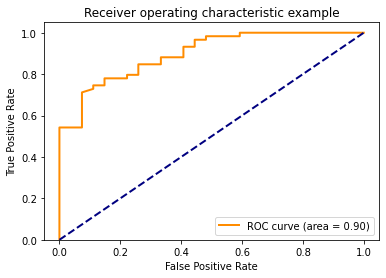

In [51]:
from sklearn import metrics
score_y_dt = lr.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, score_y_dt[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Since our ROC curve moves away from the false positive rate and is skewed towards upper right corner, out area under the curve (AUC) is also 0.9, so this makes us believe that our logistic regression model is a good model.